## 5.2 Training a convnet from scratch on a small dataset

In [26]:
import os, shutil
original_dataset_dir = 'C:/Users/Abdul Majid/Downloads/kaggle_original_data/training_set/cats'


In [27]:
base_dir = 'C:/working_Directory'
#os.mkdir(base_dir)

In [28]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [29]:
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [30]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1,1000)]#0-999
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#1000-1499
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
import os, shutil
original_dataset_dir = 'C:/Users/Abdul Majid/Downloads/kaggle_original_data/training_set/dogs'

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 999
total training dog images: 999
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


#### Instantiating a small convnet for dogs vs. cats classification

In [32]:
import tensorflow

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#### Configuring the model for training

In [23]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

#### Using ImageDataGenerator to read images from directories

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

NameError: name 'train_dir' is not defined

In [38]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Fitting the model using a batch generator

In [34]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 421s 4s/step - loss: 0.6908 - acc: 0.5335 - val_loss: 0.6736 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 457s 5s/step - loss: 0.6608 - acc: 0.6051 - val_loss: 0.6354 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 521s 5s/step - loss: 0.6109 - acc: 0.6567 - val_loss: 0.6277 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 526s 5s/step - loss: 0.5686 - acc: 0.6997 - val_loss: 0.6442 - val_acc: 0.6300
Epoch 5/30
100/100 [==============================] - 537s 5s/step - loss: 0.5364 - acc: 0.7317 - val_loss: 0.5832 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 537s 5s/step - loss: 0.5092 - acc: 0.7437 - val_loss: 0.6087 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 536s 5s/step - loss: 0.4825 - acc: 0.7668 - val_loss: 0.5881 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 533s 5s/step - 

#### Saving the model

In [38]:
model.save('cats_and_dogs_small_1.h5')

### Predictions

In [19]:
import tensorflow

In [20]:
from tensorflow.keras.models import load_model
model=load_model('cats_and_dogs_small_1.h5')

In [ ]:
import math
from random import randint
predList=[]

for i in range(10):
    img_path= f'C:/working_Directory/train/cats/{randint(1,1000)}.jpg'
    
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img=image.load_img(img_path,target_size=(150,150))
    img_tensor=image.img_to_array(img)
    img_tensor=np.expand_dims(img_tensor,axis=0)
    img_tensor /=255.
    
    predList.append(model.predict(img_tensor))
    
    import matplotlib.pyplot as plt
    plt.imshow(img_tensor[0])
    plt.show()

In [ ]:
print(predList)

for pred in predList:
    if predList>=.50:
        print('dogs')
    else:
        print('cats')
predList
    

#### Displaying curves of loss and accuracy during training

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [ ]:
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Using data augmentation
Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that at training time,
your model will never see the exact same picture twice.

#### Setting up a data augmentation configuration via ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

#### Displaying some randomly augmented training images

In [42]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)] #Module with imagepreprocessing utilities
img_path = fnames[3]  #>>>>>Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) #>>>Reads the image and resizes it

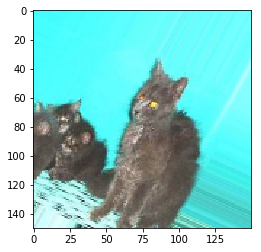

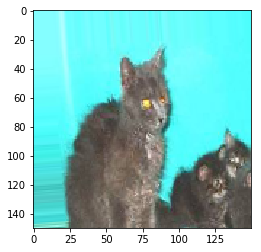

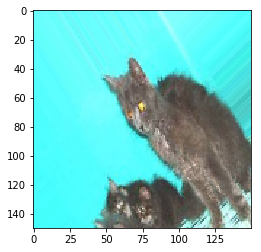

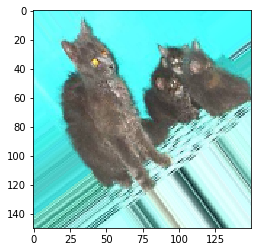

In [43]:
x = image.img_to_array(img) #>>>>Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) #>>>>Reshapes it to (1, 150, 150, 3)
i=0
for batch in datagen.flow(x, batch_size=1): #>>Generates batches ofrandomly transformed images. Loops indefinitely,
#so you need to break the loop at some point!
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Defining a new convnet that includes dropout

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

#### Training the convnet using data-augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                              validation_data=validation_generator,validation_steps=50)

In [ ]:
###>>>>>Saving the model
model.save('cats_and_dogs_small_2.h5')

## 5.3 Using a pretrained convnet

#### Instantiating the VGG16 convolutional base

In [17]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno 11004] getaddrinfo failed

In [ ]:
conv_base.summary()

#### Extracting features using the pretrained convolutional base

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

#### Defining and training the densely connected classifier

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

#### Plotting the results

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### FEATURE EXTRACTION WITH DATA AUGMENTATION

In [ ]:
 Adding a densely connected classifier on top of the convolutional base

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of 
layers means preventing their weights from being updated during training. If you don’t do this,
then the representations that were previously learned by the convolutional base will be modified during training.
Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, 
effectively destroying the representations previously learned.

In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

#### Training the model end to end with a frozen convolutional base

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,validation_steps=50)

In [ ]:
Fine Tuning>>> Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant for the problem at hand.
#matlab wo layers jo classifier ke sath juri hoti unko unfreeze rakhte convolutional base main

In [ ]:
conv_base.summary()

 #### Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
if layer.name == 'block5_conv1':
set_trainable = True
if set_trainable:
layer.trainable = True
else:
layer.trainable = False

##### Fine-tuning the model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

In [ ]:
# You can now finally evaluate this model on the test data:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

## 5.4 Visualizing what convnets learn

### 1).Visualizing intermediate activations

In [ ]:
#first push folder in a drive which u want to use in a colab
from google.colab import drive
drive.mount("/content/drive")
#then aik code aye ga usko copy krke dena hoga tw ye mount hojayegy

In [6]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_

#### Preprocessing a single image

In [3]:
img_path = 'C:/working_Directory/test/cats-VS-dogs/cat.1501.jpg'
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


#### Displaying the test picture

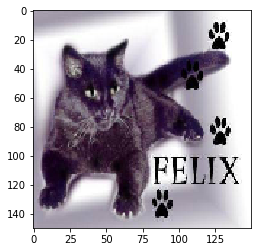

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

#### 1.Instantiating a model from an input tensor and a list of output tensors

In [7]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#### 2.Running the model in predict mode

In [8]:
activations = activation_model.predict(img_tensor)

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


#### 3.Visualizing the fourth channel

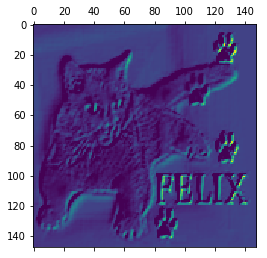

In [16]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

#### 4.Visualizing the seventh channel

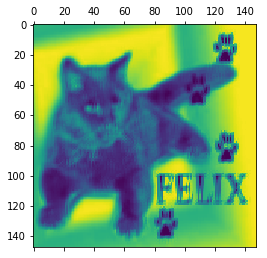

In [13]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

#### 5.Visualizing every channel in every intermediate activation

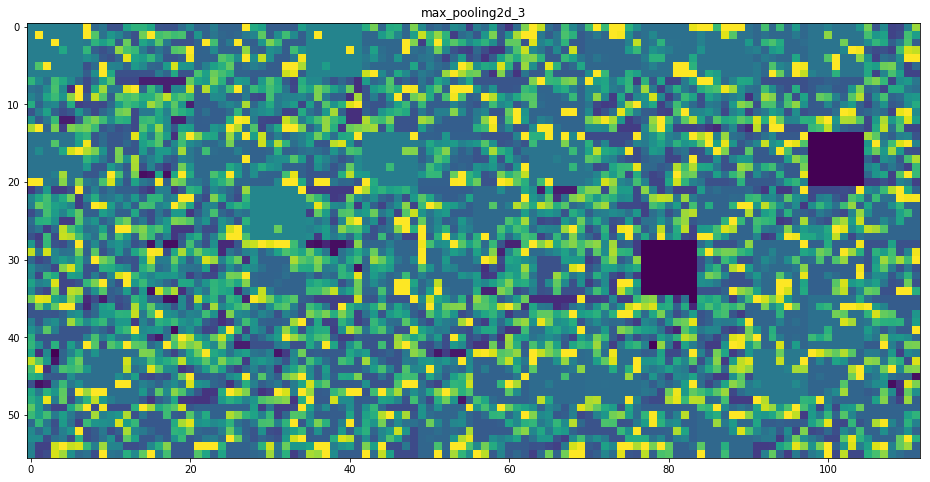

In [18]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
            
scale = 1. / size

plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

### 2) Visualizing convnet filters

#### 1.Defining the loss tensor for filter visualization

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
model = VGG16(weights='imagenet',
include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

#### 2.Obtaining the gradient of the loss with regard to the input

In [ ]:
grads = K.gradients(loss, model.input)[0]

#### 3.Gradient-normalization trick

In [ ]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#### 4.Fetching Numpy output values given Numpy input values

In [ ]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

#### 5.Loss maximization via stochastic gradient descent

In [ ]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

#### 6.Utility function to convert a tensor into a valid image

In [ ]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### 7.Function to generate filter visualizations

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))

#### 8.Generating a grid of all filter response patterns in a layer

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)